<a href="https://colab.research.google.com/github/maetthil/NASASpaceApps/blob/main/Read_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install cdflib

In [2]:
import glob
import cdflib 
import sys
import os
import requests
import pytz
import datetime
import pandas as pd
from bs4 import BeautifulSoup as bs
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

In [3]:
DATASET_PATH = 'dataset/'

In [4]:
def download_bwt_file(year='2022', data='wind', n=10):
    if data == 'dscovr':
        url = f'https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/{year}/' 
    elif data == 'wind':
        url = f'https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/{year}/'
    elif data == 'wind_ion':
        url = f'https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/{year}/'
    else:
        raise Exception('Conjunto de dados desconhecido')
    content = requests.get(url).content
    DATA_FOLDER = 'dataset/'
    if not os.path.exists(os.path.join(DATA_FOLDER, data)):
        os.makedirs(os.path.join(DATA_FOLDER, data))
    links = bs(content).findAll('a', href=True)
    print (f'Baixando arquivos de dados de {year}')
    downloaded = 0
    for link in tqdm(links):
        if downloaded == n:
            break
        filename = link['href']
        if filename.find('.cdf') < 0:
            continue
        response = requests.get(f'{url}{filename}')
        with open(f'{DATA_FOLDER}{data}/{filename}', 'wb') as f:
            f.write(response.content)
        downloaded += 1

In [5]:
download_bwt_file(data='wind')

Baixando arquivos de dados de 2022


  0%|          | 0/264 [00:00<?, ?it/s]

In [6]:
download_bwt_file(data='dscovr')

Baixando arquivos de dados de 2022


  0%|          | 0/264 [00:00<?, ?it/s]

In [7]:
download_bwt_file(data='wind_ion')

Baixando arquivos de dados de 2022


  0%|          | 0/241 [00:00<?, ?it/s]

## Leitura de dados

In [18]:
def load_cdf_files(data='wind'):
    if data == 'dscovr':
        base = 'dataset/dscovr/'
    elif data == 'wind':
        base = 'dataset/wind/'
    elif data == 'wind_ion':
        base = 'dataset/wind_ion/'
    else:
        raise Exception('Conjunto de dados desconhecido')
    files = glob.glob(os.path.join(base, '*.cdf'))
    for f in files:
        yield cdflib.cdf_to_xarray(f)

## Step one

## Step two

## Step three

In [19]:
wind_ion_ds = load_cdf_files(data='wind_ion')

In [27]:
ds = next(wind_ion_ds)

In [11]:
#Ion parameters we need
# density n(D(t))
# temperature w(D(t))
# velocity n(D(t))

In [28]:
ds

<xarray.Dataset>
Dimensions:                   (Epoch: 780)
Coordinates: (12/20)
  * Epoch                     (Epoch) float64 6.381e+13 6.381e+13 ... 6.381e+13
    Proton_sigmaV_nonlin      (Epoch) float32 5.786 5.585 5.756 ... 54.9 67.08
    Proton_sigmaVX_nonlin     (Epoch) float32 5.794 5.579 5.751 ... 55.21 67.71
    Proton_sigmaVY_nonlin     (Epoch) float32 1.0 1.0 1.0 ... 1.0 14.46 22.68
    Proton_sigmaVZ_nonlin     (Epoch) float32 1.0 1.0 1.0 ... 8.457 13.78 22.56
    Proton_sigmaW_nonlin      (Epoch) float32 1.22 1.0 1.0 ... 21.21 12.85 14.98
    ...                        ...
    Alpha_sigmaVZ_nonlin      (Epoch) float32 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    Alpha_sigmaW_nonlin       (Epoch) float32 1.22 1.0 1.0 ... 21.21 12.85 14.98
    Alpha_sigmaWperp_nonlin   (Epoch) float32 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    Alpha_sigmaWpar_nonlin    (Epoch) float32 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    Alpha_sigmaNa_nonlin      (Epoch) float32 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    sigmaPeak_doy             (Epoch) float64 8.847e-05 0.0001032 ... 4.424e-05
Data variables: (12/41)
    fit_flag                  (Epoch) int8 1 1 1 7 1 6 6 0 1 ... 1 1 6 6 6 6 6 2
    year                      (Epoch) int8 -26 -26 -26 -26 ... -26 -26 -26 -26
    doy                       (Epoch) float32 2.004 2.005 2.006 ... 2.997 2.998
    Proton_V_nonlin           (Epoch) float32 551.4 558.5 575.6 ... 467.7 476.4
    Proton_VX_nonlin          (Epoch) float32 -550.7 -557.9 ... -464.9 -471.4
    Proton_VY_nonlin          (Epoch) float32 -11.41 -24.11 ... 32.73 46.1
    ...                        ...
    dev                       (Epoch) float32 0.07603 0.0952 ... 0.1066 0.2022
    xgse                      (Epoch) float32 243.1 243.1 243.1 ... 244.2 244.2
    ygse                      (Epoch) float32 75.85 75.85 75.85 ... 73.6 73.59
    zgse                      (Epoch) float32 9.516 9.516 9.517 ... 9.786 9.786
    ygsm                      (Epoch) float32 70.62 70.63 70.63 ... 68.11 68.12
    zgsm                      (Epoch) float32 29.28 29.26 29.24 ... 29.55 29.53
Attributes: (12/19)
    Project:                     WIND/SWE Faraday Cup (Proton - Alpha Anisotr...
    Source_name:                 Wind
    Discipline:                  ['Space Physics>Magnetospheric Science', 'Sp...
    Data_type:                   VS>Validated Summary Data
    Descriptor:                  SWE>Solar Wind Experiment
    File_naming_convention:      source_datatype_descriptor
    ...                          ...
    Logical_file_id:             wi_h1_swe_20220102_v01
    Logical_source_description:  Solar wind proton and alpha parameters, incl...
    Time_resolution:             92 seconds
    Generated_by:                Michael L. Stevens (mstevens@cfa.harvard.edu)
    Generation_date:             Fri Feb 18 15:14:53 2022
    MODS:                        data analysis package revised March, 2012.

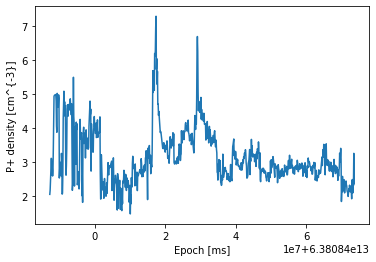

In [29]:
t['Proton_Np_nonlin'].plot()